# **TASK 1: MOVIE GENRE CLASSIFICATION**
>  ### **ELOMUNAIT JOHN OMODING**

In this machine learning project, we aim to predict the genre of a movie based on its plot summary using various natural language processing (NLP) techniques and machine learning algorithms. We will leverage techniques like TF-IDF (Term Frequency-Inverse Document Frequency) and classifiers such as Naive Bayes, Logistic Regression, or Support Vector Machines (SVM) to build an accurate genre classification model.

In [37]:
!pip install scikit-optimize scikit-learn

In [38]:
!pip install nltk

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re  # used for pattern matching and text manipulation.
import string
import nltk #a powerful library for working with human language data.
from nltk.corpus import stopwords #for cleaning
from nltk.stem import LancasterStemmer ##for cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Import necessary metrics from sklearn.metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
train_path = '/content/drive/MyDrive/Genre Classification Dataset/train_data.txt'
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [42]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [43]:
test_path = '/content/drive/MyDrive/Genre Classification Dataset/test_data.txt'
test_data = pd.read_csv(test_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
test_data.head()

,Title,Genre,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [44]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  int64 
 1   Genre        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


<ipython-input-45-b55cf21b0b29>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='inferno')
<ipython-input-45-b55cf21b0b29>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='inferno')


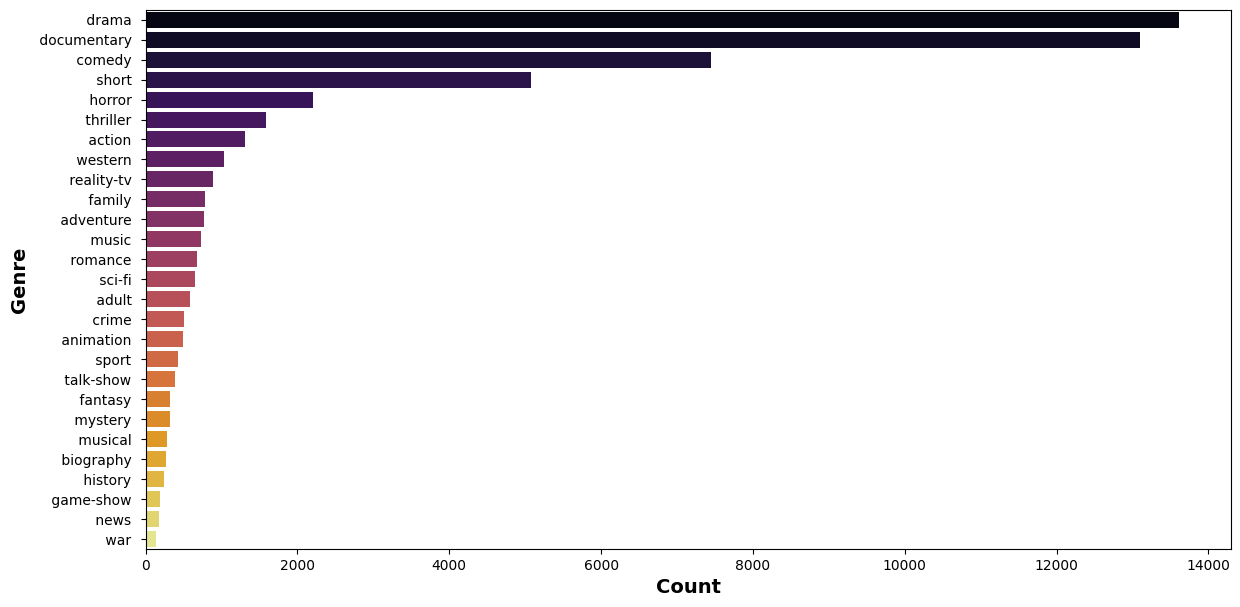

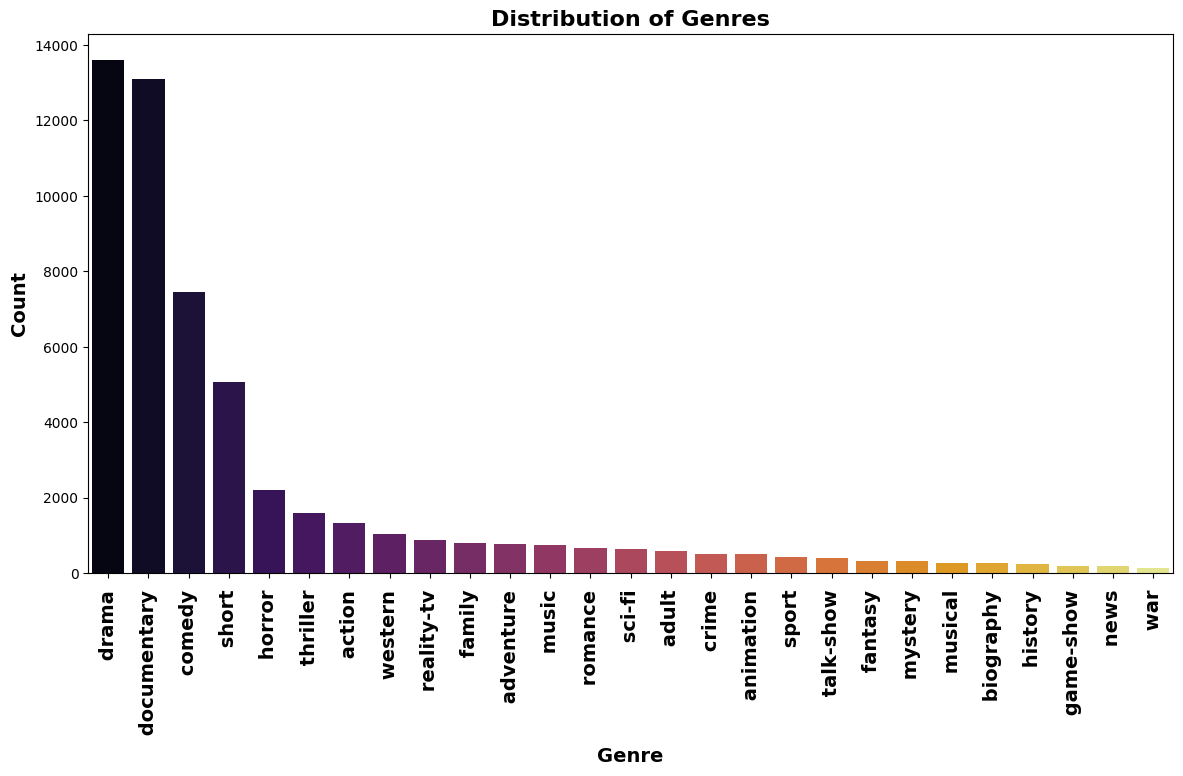

In [45]:
# Plot the distribution of genres in the training data
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='inferno')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')

# Plot the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = train_data['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='inferno')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [46]:
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)  # Remove picture links
    text = re.sub(r"[^a-zA-Z']", ' ', text)  # Keep only characters and apostrophes
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
# Initialize the TF-IDF vectorizer
vectorize = TfidfVectorizer()
# Fit and transform the training data
X_train = vectorize.fit_transform(train_data['Text_cleaning'])
# Transform the test data
X_eval = vectorize.transform(test_data['Text_cleaning'])

In [48]:
X = X_train
y = train_data["Genre"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [49]:
from sklearn.naive_bayes import MultinomialNB
# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB()
# Train the classifier
model.fit(X_train, Y_train)

MultinomialNB()

In [50]:
# Evaluate the classifier on the training set
train_accuracy = model.score(X_train, Y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.46816997532913696


In [51]:
# Predictions on the test set
y_pred_model = model.predict(X_test)
y_pred_model

array([' drama ', ' drama ', ' drama ', ..., ' drama ', ' documentary ',
       ' drama '], dtype='<U13')

In [52]:
# Evaluate the classifier on the test set
test_accuracy = accuracy_score(Y_test, y_pred_model)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.44526422576777647


In [53]:
# Print classification report
print(classification_report(Y_test, y_pred_model))

               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.61      0.04      0.07      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
from skopt import BayesSearchCV
from skopt.space import Real
from sklearn.utils import parallel_backend

# Define parameter distributions for Bayesian optimization
param_dist = {
    'alpha': Real(1e-10, 1e+10, prior='log-uniform')
}

# Initialize SVM classifier
mnb = MultinomialNB()

# Perform randomized search with cross-validation
bayes_search = BayesSearchCV(
    mnb,
    search_spaces=param_dist,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)
with parallel_backend('threading'):  # Change to 'threading' or 'multiprocessing' based on your preference
  bayes_search.fit(X_train, Y_train)

# Print best parameters and best score
print("Best Parameters:", bayes_search.best_params_)
print("Best Score:", bayes_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........................alpha=0.01592499032163409; total time=   0.4s
[CV] END ..........................alpha=0.01592499032163409; total time=   0.7s
[CV] END ..........................alpha=0.01592499032163409; total time=   0.4s
[CV] END ..........................alpha=0.01592499032163409; total time=   0.4s
[CV] END ..........................alpha=0.01592499032163409; total time=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ............................alpha=5594575.138586148; total time=   0.6s
[CV] END ............................alpha=5594575.138586148; total time=   0.8s
[CV] END ............................alpha=5594575.138586148; total time=   0.7s
[CV] END ............................alpha=5594575.138586148; total time=   0.7s
[CV] END ............................alpha=5594575.138586148; total time=   0.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................alpha=3.2548949915306913e-09; total time=   0.4s
[CV] END .......................alpha=3.2548949915306913e-09; total time=   0.6s
[CV] END .......................alpha=3.2548949915306913e-09; total time=   0.4s
[CV] END .......................alpha=3.2548949915306913e-09; total time=   0.5s
[CV] END .......................alpha=3.2548949915306913e-09; total time=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........................alpha=0.018356870451947976; total time=   0.6s
[CV] END .........................alpha=0.018356870451947976; total time=   0.6s
[CV] END .........................alpha=0.018356870451947976; total time=   0.5s
[CV] END .........................alpha=0.018356870451947976; total time=   0.6s
[CV] END .........................alpha=0.018356870451947976; total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

In [55]:
# Predictions on test set using the optimized model
y_pred_optimized = bayes_search.predict(X_test)

# Model evaluation
accuracy_optimized = accuracy_score(Y_test, y_pred_optimized)
print("Test Accuracy (Optimized Model):", accuracy_optimized)
print(classification_report(Y_test, y_pred_optimized))

Test Accuracy (Optimized Model): 0.5404408374066217
               precision    recall  f1-score   support

      action        0.46      0.20      0.28       263
       adult        0.84      0.28      0.42       112
   adventure        0.49      0.14      0.21       139
   animation        0.46      0.06      0.10       104
   biography        0.00      0.00      0.00        61
      comedy        0.50      0.50      0.50      1443
       crime        0.00      0.00      0.00       107
 documentary        0.60      0.84      0.70      2659
       drama        0.50      0.75      0.60      2697
      family        0.52      0.10      0.17       150
     fantasy        0.12      0.01      0.02        74
   game-show        1.00      0.30      0.46        40
     history        0.00      0.00      0.00        45
      horror        0.69      0.51      0.58       431
       music        0.61      0.42      0.49       144
     musical        0.00      0.00      0.00        50
     mystery

In [ ]:
# Predictions on test set using the optimized model
y_optimized = bayes_search.predict(X_eval)

In [58]:
# Create a DataFrame with test data and predicted genres
results_df = pd.DataFrame({'Title': test_data['Title'], 'Actual_Genre': Y_test, 'Predicted_Genre': y_optimized})

# Save DataFrame to CSV file
results_df.to_csv('/content/drive/MyDrive/Genre Classification Dataset/test_data_predicted.csv', index=False)
results_df.head(10)

,Title,Actual_Genre,Predicted_Genre
0,1,NaN,comedy
1,2,NaN,drama
2,3,NaN,documentary
3,4,NaN,drama
4,5,NaN,drama
5,6,drama,drama
6,7,NaN,drama
7,8,comedy,comedy
8,9,NaN,documentary
9,10,NaN,documentary
